<h1>Corona Spread Data Analysis</h1>
<p> first we import the required libraries. </p>

In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import rcParams
rcParams['animation.embed_limit'] = 50

now we import the timeseries data and have look at its properties.

In [94]:
confirmed_df = pd.read_csv("./COVID-19-master/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
death_df = pd.read_csv("./COVID-19-master/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv("./COVID-19-master/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

confirmed_df.info()
confirmed_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


lets see some of the data.

In [95]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


its obvious that running describe on time series data isnt that usefull. so lets dig deeper and find more meaningfull information.
first lets determine the start and end date of data. we can also derive the length of the time period wich the data has been captured.

In [96]:
def days_to_human_readable(days):
    years = days // 365
    days %= 365
    months = days // 30
    days %= 30
    weeks = days // 7
    days %= 7

    result = []
    if years > 0:
        result.append(f"{years} year{'s' if years > 1 else ''}")
    if months > 0:
        result.append(f"{months} month{'s' if months > 1 else ''}")
    if weeks > 0:
        result.append(f"{weeks} week{'s' if weeks > 1 else ''}")
    if days > 0:
        result.append(f"{days} day{'s' if days > 1 else ''}")

    return ", ".join(result)

In [97]:
start_date = date_object = datetime.strptime(confirmed_df.columns[4], "%m/%d/%y")
end_date = date_object = datetime.strptime(confirmed_df.columns[-1], "%m/%d/%y")
print(f"timeseries data ranges from date {start_date.date()} to {end_date.date()}")
print(f"Length: {days_to_human_readable((end_date - start_date).days)}") 

timeseries data ranges from date 2020-01-22 to 2023-03-09
Length: 3 years, 1 month, 2 weeks, 3 days


now lets inspect the data of some interesting contries. lets start with Iran. to simplify our work for future we define two functions. one for extracting data of a specific country and one for displaying an arbitarary timeseries data.

In [114]:
def extract_country(country_name):
    def clean_data(df):
        df.drop(columns=["Province/State", "Country/Region", "Lat", "Long"],inplace=True)
        df = df.T
        df.reset_index(inplace=True)
        df.columns = ['Date', 'Value']
        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
        return df

    confirmed = confirmed_df[confirmed_df["Country/Region"] == country_name].copy()
    death = death_df[death_df["Country/Region"] == country_name].copy()
    recovered = recovered_df[recovered_df["Country/Region"] == country_name].copy()
    latitude = confirmed["Lat"]
    longitude = confirmed["Long"]
    confirmed = clean_data(confirmed)
    death = clean_data(death)
    recovered = clean_data(recovered)
    return (latitude, longitude, confirmed, death, recovered)

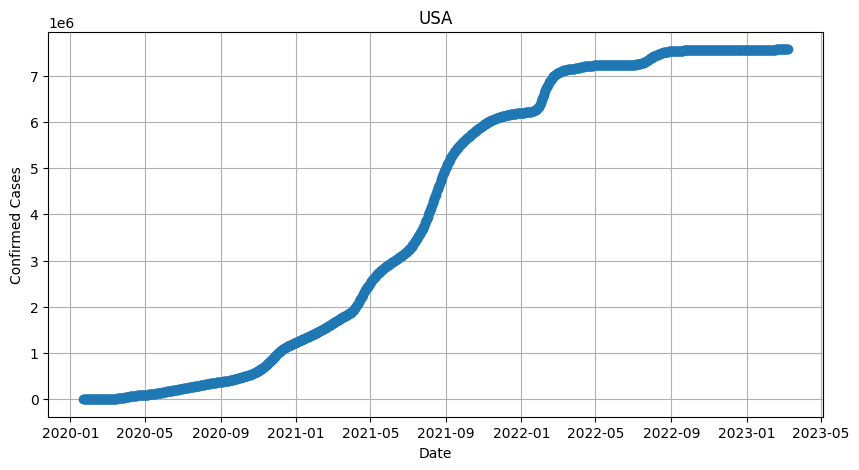

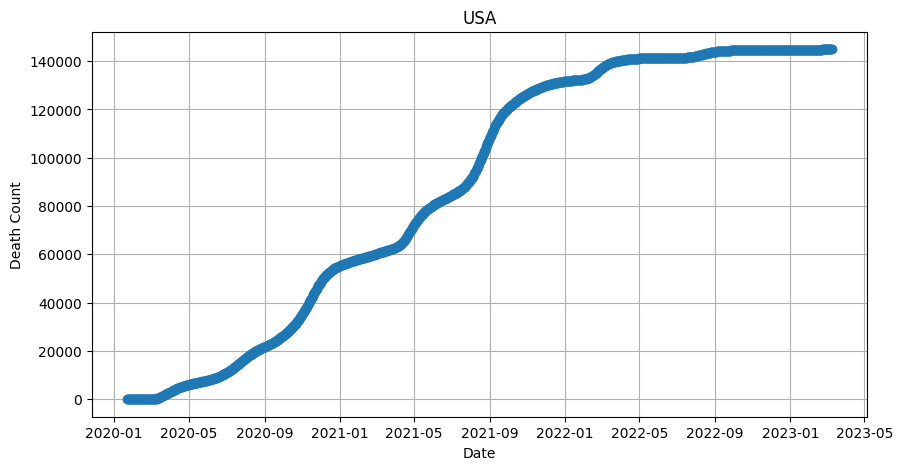

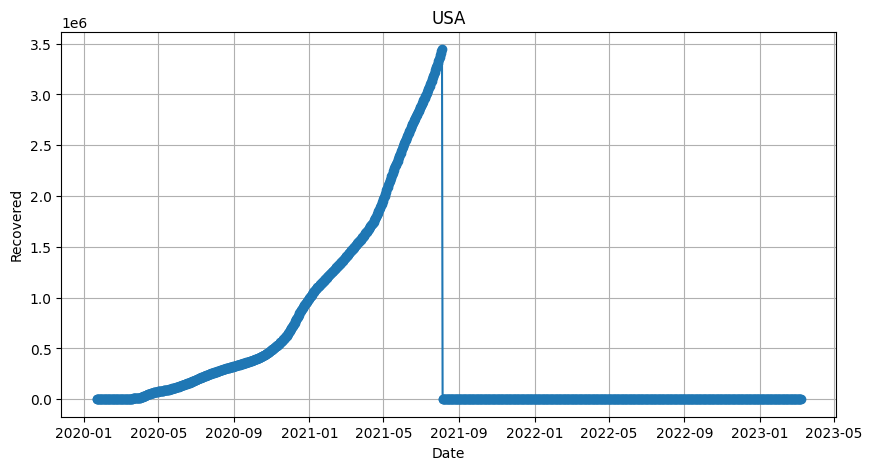

In [ ]:
def plot_timeseries(title, y_label, df):
    # Plot the time series
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Value'], marker='o')
    plt.title(f'{title}')
    plt.xlabel('Date')
    plt.ylabel(f'{y_label}')
    plt.grid()
    plt.show()
latitude, longitude, confirmed, death, recovered = extract_country("Iran")
plot_timeseries("Belarus", "Confirmed Cases", confirmed)
plot_timeseries("Belarus", "Death Count", death)
plot_timeseries("Belarus", "Recovered", recovered)


this is the plot of confirmed cases. lets see the number of infected, dead and curred people at the same time.